In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# import the iris dataset
iris = pd.read_csv('datasets/iris.csv')

# select columns for training and testing
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',]]
y = iris['Species']

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=99)

X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
112,6.8,3.0,5.5,2.1
97,6.2,2.9,4.3,1.3
86,6.7,3.1,4.7,1.5
67,5.8,2.7,4.1,1.0
126,6.2,2.8,4.8,1.8
...,...,...,...,...
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8
68,6.2,2.2,4.5,1.5
35,5.0,3.2,1.2,0.2


In [2]:
from sklearn.feature_selection import mutual_info_classif as mutual_information

# mutual information for the raw data
mutual_information(X_train, y_train)

array([0.50497503, 0.19601695, 1.00554225, 0.99304098])

In [3]:
from sklearn.decomposition import PCA

# fit the data into a principal component analysis
pca = PCA(n_components=1).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# mutual information for pca data
mutual_information(X_train_pca, y_train)

array([0.97200858])

In [4]:
from sklearn.linear_model import LogisticRegression

# we now compare the prediction performance of the PCA embedding vs petal length
X_train_petal_length = X_train[['PetalLengthCm']]
X_test_petal_length = X_test[['PetalLengthCm']]

# classify the data using logistic regression
print('Petal Length')
logistic_regression = LogisticRegression(random_state=0).fit(X_train_petal_length, y_train)
print('Train accuracy:', logistic_regression.score(X_train_petal_length, y_train))
print('Test accuracy:', logistic_regression.score(X_test_petal_length, y_test))

# classify the data using logistic regression
print('\nPCA')
logistic_regression = LogisticRegression(random_state=0).fit(X_train_pca, y_train)
print('Train accuracy:', logistic_regression.score(X_train_pca, y_train))
print('Test accuracy:', logistic_regression.score(X_test_pca, y_test))

Petal Length
Train accuracy: 0.9553571428571429
Test accuracy: 0.9473684210526315

PCA
Train accuracy: 0.9285714285714286
Test accuracy: 0.9473684210526315


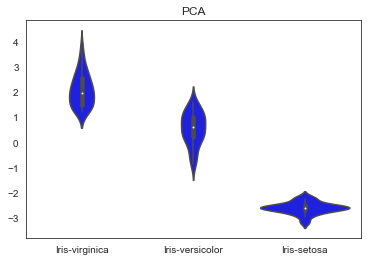

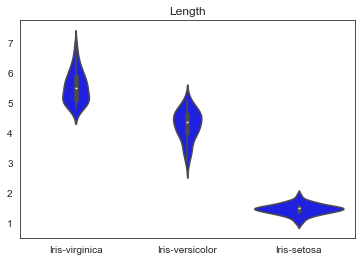

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

sns.violinplot(x=y_train.to_list(), y=list(X_train_pca.T[0]), color='blue')
plt.title('PCA')
plt.show()

sns.violinplot(x=y_train.to_list(), y=X_train_petal_length['PetalLengthCm'].to_list(), color='blue')
plt.title('Length')
plt.show()